# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [5]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

mysql-connector-python 8.0.12 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mysql-connector-python 8.0.12 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


mysql-connector-python 8.0.12 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Importando bibliotecas

In [6]:
import seaborn as sns
import pandas as pd
import psycopg2

In [ ]:
### Usando psycopg2 para configurar conexão

In [7]:
conn = psycopg2.connect(host="stampy.db.elephantsql.com",database="pvunmqpv", user="pvunmqpv", password="rX3CKCsGeqAIlEut5W2HeMxF8f-uyYNA")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Exibir Relatóriodo histórico de P.h dos tanques


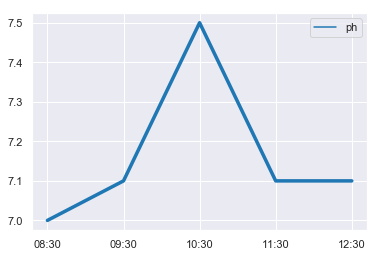

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

tanque = pd.read_sql_query("""
                            select * from historicomedicao where fk_tanque_idtanque=2;                            
                            """,conn)

dates  = ["08:30","09:30","10:30","11:30","12:30"]

tanque=list(tanque['ph'])
data = pd.DataFrame(tanque,dates, columns=["ph"] )
data = data.rolling(1).mean()

sns.lineplot(data=data, palette="tab10", linewidth=3.5)


# Relatorio 2

### Objetivo: Exibir o oxigênio do tanque

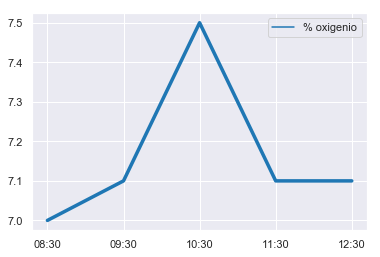

In [11]:
result = pd.read_sql_query("""
                            select * from historicomedicao where fk_tanque_idtanque=2;
                            """,conn)
oxigenio=list(result['oxigenio'])
dates  = ["08:30","09:30","10:30","11:30","12:30"]
data = pd.DataFrame(tanque,dates, columns=["% oxigenio"] )
sns.lineplot(data=data, palette="tab10", linewidth=3.5)


# Relatorio 3

### Objetivo: Exibir a temperatura do tanque

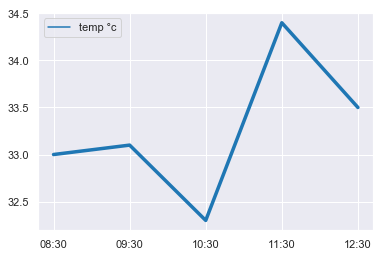

In [20]:
result = pd.read_sql_query("""
                            select * from historicomedicao historicomedicao where fk_tanque_idtanque=2;
                            """,conn)

temperatura=list(result['temperatura'])
dates  = ["08:30","09:30","10:30","11:30","12:30"]
data = pd.DataFrame(temperatura,dates, columns=["temp °c"] )
sns.lineplot(data=data, palette="tab10", linewidth=3.5)




Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

# Relatório 4

### Um histórico dos Tanques, com base nos funcionários.

In [21]:
result = pd.read_sql_query("""SELECT nome,cpf,idtanque, historicomedicao.temperatura,historicomedicao.ph,historicomedicao.oxigenio,nomecientifico,tipoagua,hora,data
                          FROM  funcionario inner join tanque on(tanque.idtanque=funcionario.fk_tanque_idtanque)
                          inner join peixe on (tanque.fk_peixe_idpeixe=peixe.idpeixe)
                          inner join historicomedicao on (historicomedicao.fk_tanque_idtanque=tanque.idtanque)
                          order by(hora,data);
                          """,conn);
result

,nome,cpf,idtanque,temperatura,ph,oxigenio,nomecientifico,tipoagua,hora,data
0,joaquim,12331622510,4,33.0,7.0,8.6,tilapia,doce,08:30:00,2018-01-28
1,marcelo,14730683714,1,34.0,7.5,8.9,tilapia,doce,08:30:00,2018-01-28
2,bilbo,98753612345,5,34.0,7.5,8.9,dourado,doce,08:30:00,2018-01-28
3,olavo,74731683511,2,33.0,7.0,8.6,tilapia,doce,08:30:00,2018-01-28
4,jose,71131683510,3,34.0,7.5,8.9,dourado,doce,08:30:00,2018-01-28
5,joaquim,12331622510,4,33.1,7.1,8.8,tilapia,doce,09:30:00,2018-01-28
6,jose,71131683510,3,34.1,7.6,8.8,dourado,doce,09:30:00,2018-01-28
7,olavo,74731683511,2,33.1,7.1,8.8,tilapia,doce,09:30:00,2018-01-28
8,bilbo,98753612345,5,34.1,7.6,8.8,dourado,doce,09:30:00,2018-01-28
9,marcelo,14730683714,1,34.1,7.6,8.8,tilapia,doce,09:30:00,2018-01-28


# Relatório 5 

### mostrar dados  de informções  de contato dos funcionarios

In [19]:
result =pd.read_sql_query("""
                SELECT nome,cpf,cidade,bairro,logradouro,cep,dado as telefone FROM  funcionario inner join endereco on (endereco.fk_funcionario_idfuncionario=funcionario.idfuncionario)
                    inner join contato on (contato.fk_funcionario_idfuncionario=funcionario.idfuncionario)
                    where 	fk_tipocontato_idtipo=2;
                            """,conn)
result

,nome,cpf,cidade,bairro,logradouro,cep,telefone
0,marcelo,14730683714,vila velha,soteco,rua visconde de taunay,29106080,33394433
1,olavo,74731683511,vila velha,cocal,rua cravos verdes,29106090,33393191
2,jose,71131683510,vila velha,cocal,rua laranja mecanica,29106100,33323987
3,joaquim,12331622510,vila velha,soteco,rua dos alfaiates,29106110,33393123
4,bilbo,98753612345,vila velha,condado,rua ponei saltitante,29106120,33393789


# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>